ML- Supervised

Supervised has two variables

X,Y

Y-single value var-target

X-multi value var-Independent(Data)

.

.

First-Linear Regression

In [1]:
import pandas as pd
import numpy

In [2]:
df=pd.read_csv("Used_Bikes.csv")
df

,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield
2,Triumph Daytona 675R,600000.0,Delhi,110.0,First Owner,8.0,675.0,Triumph
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329.0,First Owner,4.0,180.0,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000.0,First Owner,3.0,150.0,Yamaha
...,...,...,...,...,...,...,...,...
32643,Hero Passion Pro 100cc,39000.0,Delhi,22000.0,First Owner,4.0,100.0,Hero
32644,TVS Apache RTR 180cc,30000.0,Karnal,6639.0,First Owner,9.0,180.0,TVS
32645,Bajaj Avenger Street 220,60000.0,Delhi,20373.0,First Owner,6.0,220.0,Bajaj
32646,Hero Super Splendor 125cc,15600.0,Jaipur,84186.0,First Owner,16.0,125.0,Hero


In [3]:
df.drop_duplicates(inplace=True)

In [4]:
df.isnull().sum()

bike_name     0
price         0
city          0
kms_driven    0
owner         0
age           0
power         0
brand         0
dtype: int64

In [5]:
numerical=df.select_dtypes(exclude="O")
numerical

,price,kms_driven,age,power
0,35000.0,17654.0,3.0,110.0
1,119900.0,11000.0,4.0,350.0
2,600000.0,110.0,8.0,675.0
3,65000.0,16329.0,4.0,180.0
4,80000.0,10000.0,3.0,150.0
...,...,...,...,...
9362,25000.0,48587.0,8.0,150.0
9369,35000.0,60000.0,9.0,220.0
9370,450000.0,3430.0,4.0,750.0
9371,139000.0,21300.0,4.0,400.0


In [6]:
catgorical=df.select_dtypes(include="O")
catgorical

,bike_name,city,owner,brand
0,TVS Star City Plus Dual Tone 110cc,Ahmedabad,First Owner,TVS
1,Royal Enfield Classic 350cc,Delhi,First Owner,Royal Enfield
2,Triumph Daytona 675R,Delhi,First Owner,Triumph
3,TVS Apache RTR 180cc,Bangalore,First Owner,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,Bangalore,First Owner,Yamaha
...,...,...,...,...
9362,Hero Hunk Rear Disc 150cc,Delhi,First Owner,Hero
9369,Bajaj Avenger 220cc,Bangalore,First Owner,Bajaj
9370,Harley-Davidson Street 750 ABS,Jodhpur,First Owner,Harley-Davidson
9371,Bajaj Dominar 400 ABS,Hyderabad,First Owner,Bajaj


In [7]:
df['brand'].value_counts().keys()

Index(['Bajaj', 'Royal Enfield', 'Hero', 'Honda', 'Yamaha', 'TVS', 'KTM',
       'Suzuki', 'Harley-Davidson', 'Kawasaki', 'Hyosung', 'Mahindra',
       'Benelli', 'Triumph', 'Ducati', 'BMW', 'Jawa', 'Indian', 'MV',
       'Rajdoot', 'LML', 'Yezdi', 'Ideal'],
      dtype='object', name='brand')

In [8]:
brand_list=['Bajaj', 'Royal Enfield', 'Hero', 'Honda', 'Yamaha', 'TVS', 'KTM',
       'Suzuki', 'Harley-Davidson', 'Kawasaki', 'Hyosung', 'Mahindra',
       'Benelli', 'Triumph', 'Ducati', 'BMW']

In [9]:
df1=df[df["brand"].isin(brand_list)]
df1

,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield
2,Triumph Daytona 675R,600000.0,Delhi,110.0,First Owner,8.0,675.0,Triumph
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329.0,First Owner,4.0,180.0,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000.0,First Owner,3.0,150.0,Yamaha
...,...,...,...,...,...,...,...,...
9362,Hero Hunk Rear Disc 150cc,25000.0,Delhi,48587.0,First Owner,8.0,150.0,Hero
9369,Bajaj Avenger 220cc,35000.0,Bangalore,60000.0,First Owner,9.0,220.0,Bajaj
9370,Harley-Davidson Street 750 ABS,450000.0,Jodhpur,3430.0,First Owner,4.0,750.0,Harley-Davidson
9371,Bajaj Dominar 400 ABS,139000.0,Hyderabad,21300.0,First Owner,4.0,400.0,Bajaj


In [10]:
catgorical['owner'].value_counts()

owner
First Owner             6642
Second Owner             588
Third Owner               84
Fourth Owner Or More      10
Name: count, dtype: int64

In [11]:
dt1={"First Owner":1,"Second Owner":2,"Third Owner":3,"Fourth Owner Or More":4}

catgorical['owner']=catgorical["owner"].map(dt1)

In [12]:
catgorical

,bike_name,city,owner,brand
0,TVS Star City Plus Dual Tone 110cc,Ahmedabad,1,TVS
1,Royal Enfield Classic 350cc,Delhi,1,Royal Enfield
2,Triumph Daytona 675R,Delhi,1,Triumph
3,TVS Apache RTR 180cc,Bangalore,1,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,Bangalore,1,Yamaha
...,...,...,...,...
9362,Hero Hunk Rear Disc 150cc,Delhi,1,Hero
9369,Bajaj Avenger 220cc,Bangalore,1,Bajaj
9370,Harley-Davidson Street 750 ABS,Jodhpur,1,Harley-Davidson
9371,Bajaj Dominar 400 ABS,Hyderabad,1,Bajaj


In [13]:
brand_list
brand_s={'Bajaj':1,
 'Hero':2,
 'Royal Enfield':3,
 'Yamaha':4,
 'Honda':5,
 'Suzuki':6,
 'TVS':7,
 'KTM':8,
 'Harley-Davidson':9,
 'Kawasaki':10,
 'Hyosung':11,
 'Benelli':12,
 'Mahindra':13,
 'Triumph':14,
 'Ducati':15,
 'BMW':16}


In [14]:
# brand_li

In [15]:
dt={}
for i in range(0,len(brand_list)):
    dt[brand_list[i]]=i+1

dt    

{'Bajaj': 1,
 'Royal Enfield': 2,
 'Hero': 3,
 'Honda': 4,
 'Yamaha': 5,
 'TVS': 6,
 'KTM': 7,
 'Suzuki': 8,
 'Harley-Davidson': 9,
 'Kawasaki': 10,
 'Hyosung': 11,
 'Mahindra': 12,
 'Benelli': 13,
 'Triumph': 14,
 'Ducati': 15,
 'BMW': 16}

In [16]:
catgorical['brand']=catgorical['brand'].map(dt)

In [17]:
catgorical

,bike_name,city,owner,brand
0,TVS Star City Plus Dual Tone 110cc,Ahmedabad,1,6.0
1,Royal Enfield Classic 350cc,Delhi,1,2.0
2,Triumph Daytona 675R,Delhi,1,14.0
3,TVS Apache RTR 180cc,Bangalore,1,6.0
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,Bangalore,1,5.0
...,...,...,...,...
9362,Hero Hunk Rear Disc 150cc,Delhi,1,3.0
9369,Bajaj Avenger 220cc,Bangalore,1,1.0
9370,Harley-Davidson Street 750 ABS,Jodhpur,1,9.0
9371,Bajaj Dominar 400 ABS,Hyderabad,1,1.0


In [18]:
catgorical.drop(columns=["bike_name","city"],inplace=True)

In [19]:
catgorical

,owner,brand
0,1,6.0
1,1,2.0
2,1,14.0
3,1,6.0
4,1,5.0
...,...,...
9362,1,3.0
9369,1,1.0
9370,1,9.0
9371,1,1.0


In [20]:
catgorical[(catgorical['brand'].isnull())==True]

,owner,brand
288,1,NaN
367,1,NaN
390,1,NaN
618,1,NaN
627,1,NaN
1427,1,NaN
1519,2,NaN
1532,1,NaN
2948,1,NaN
4711,1,NaN


In [21]:
df2=pd.concat([catgorical, numerical],axis=1)
df2.head()

,owner,brand,price,kms_driven,age,power
0,1,6.0,35000.0,17654.0,3.0,110.0
1,1,2.0,119900.0,11000.0,4.0,350.0
2,1,14.0,600000.0,110.0,8.0,675.0
3,1,6.0,65000.0,16329.0,4.0,180.0
4,1,5.0,80000.0,10000.0,3.0,150.0


In [22]:
df2.dropna(inplace=True)

In [23]:
#x contains all columns accept price
x=df2.drop("price",axis=1)
x.head()

,owner,brand,kms_driven,age,power
0,1,6.0,17654.0,3.0,110.0
1,1,2.0,11000.0,4.0,350.0
2,1,14.0,110.0,8.0,675.0
3,1,6.0,16329.0,4.0,180.0
4,1,5.0,10000.0,3.0,150.0


In [24]:
#y contains only price
y=df2[["price"]]
y.head()

,price
0,35000.0
1,119900.0
2,600000.0
3,65000.0
4,80000.0


#We will give x and will get y.

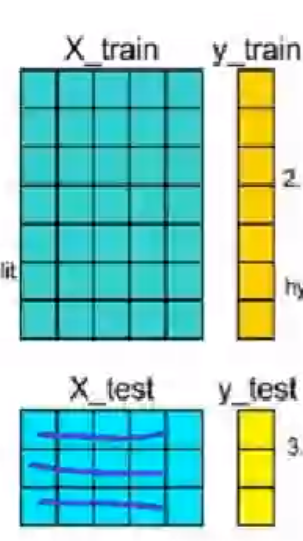

#we will select randomly for better classification

In [25]:
#its a library contains functions and algos regarding machine learning
from sklearn.model_selection import train_test_split

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2) # test part =20 and train size=0.8
#sequence of values returned by train_test_split

#Linear regression is used

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
lg=LinearRegression() #Used to study data

In [29]:
x_train.isnull().sum()

owner         0
brand         0
kms_driven    0
age           0
power         0
dtype: int64

In [30]:
#algorithm for training
lg.fit(x_train,y_train) #For training purpose

LinearRegression()

In [31]:
print("Training score:",round(lg.score(x_train,y_train)*100,2))
print("Testing score:",round(lg.score(x_train,y_train)*100,2))

Training score: 73.32
Testing score: 73.32


In [32]:
x_test.count()

owner         1462
brand         1462
kms_driven    1462
age           1462
power         1462
dtype: int64

In [33]:
y_hat=lg.predict(x_test) #predict

In [34]:
y_test['prediction']=y_hat

In [35]:
y_test

,price,prediction
2269,130000.0,154967.770024
3170,120000.0,209782.811744
7832,115000.0,143697.239318
2509,20000.0,-4832.115836
7473,24000.0,-13298.740152
...,...,...
4980,23000.0,-17830.248951
4904,35900.0,94271.222216
4238,36500.0,18198.696334
2758,40400.0,34058.250694


In [36]:
y_test["prediction"]=y_test['prediction'].map(lambda x:round(x,2)) #to round values

In [37]:
y_test

,price,prediction
2269,130000.0,154967.77
3170,120000.0,209782.81
7832,115000.0,143697.24
2509,20000.0,-4832.12
7473,24000.0,-13298.74
...,...,...
4980,23000.0,-17830.25
4904,35900.0,94271.22
4238,36500.0,18198.70
2758,40400.0,34058.25


In [38]:
y_test.head(40) 

,price,prediction
2269,130000.0,154967.77
3170,120000.0,209782.81
7832,115000.0,143697.24
2509,20000.0,-4832.12
7473,24000.0,-13298.74
9372,80000.0,57678.64
4627,104100.0,198877.11
4799,35000.0,-6594.81
5557,102000.0,115325.63
182,700000.0,741694.50


In [39]:
from sklearn.ensemble import RandomForestRegressor
rdf=RandomForestRegressor()

In [40]:
rdf.fit(x_train,y_train)

C:\Users\jangi\AppData\Local\Temp\ipykernel_1032\1942363320.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rdf.fit(x_train,y_train)


RandomForestRegressor()

In [41]:
print("Training score:",round(rdf.score(x_train,y_train)*100,2))
print("Testing score:",round(rdf.score(x_train,y_train)*100,2))

Training score: 98.37
Testing score: 98.37


In [42]:
##rdf.predict(x_test)

In [43]:
import joblib # to save variables permanently
#used because training takes time so it should save


In [44]:
ls=[1,2,4,5]

In [45]:
joblib.dump(ls,"Numbers_list.lb")#extension should be lb
#used to save but encrypted

['Numbers_list.lb']

In [46]:
numbers=joblib.load("Numbers_list.lb") # to load file
numbers

[1, 2, 4, 5]

In [47]:
joblib.dump(lg,"Linear_Regression_Model.lb")

['Linear_Regression_Model.lb']

In [48]:
#do not write .lb to hide file from others

In [49]:
y_hat1=rdf.predict(x_test) #predict